In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv('hospital_raw_data.csv')

df.head()


,Patient_ID,Name,Age,Gender,Blood_Type,Disease,Admission_Date,Discharge_Date,Days_Admitted,Doctor,Hospital_Department,Bill_Amount,Payment_Method,City,Follow_Up_Required
0,P1480,Patient_480,12.0,Feale,O+,Covid-19,2024-01-10,2024-01-11,1,Dr. Iyer,Neurology,36542.0,Cash,Delhi,Yes
1,P1449,Patient_449,54.0,Mlae,B+,Covid-19,2024-03-18,2024-03-21,3,Dr. Mehta,Orthopedics,188356.0,Cash,Bengaluru,No
2,P1475,Patient_475,NaN,Feale,AB-,Cardiac Arrest,2024-07-13,2024-07-22,9,Dr. Sharma,General Medicine,267888.0,Insurance,Delhi,Yes
3,P1434,Patient_434,86.0,Other,A+,Asthma,2024-10-26,2024-10-27,1,Dr. Khan,Neurology,232893.0,Insurance,Chennai,Yes
4,P1368,Patient_368,6.0,Other,O-,Covid-19,2024-06-16,2024-06-13,6,Dr. Patel,General Medicine,42197.0,Cash,Chennai,No


In [79]:
df.shape

(510, 15)

In [80]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           510 non-null    object 
 1   Name                 510 non-null    object 
 2   Age                  484 non-null    float64
 3   Gender               510 non-null    object 
 4   Blood_Type           510 non-null    object 
 5   Disease              510 non-null    object 
 6   Admission_Date       510 non-null    object 
 7   Discharge_Date       510 non-null    object 
 8   Days_Admitted        510 non-null    int64  
 9   Doctor               510 non-null    object 
 10  Hospital_Department  510 non-null    object 
 11  Bill_Amount          510 non-null    float64
 12  Payment_Method       510 non-null    object 
 13  City                 510 non-null    object 
 14  Follow_Up_Required   510 non-null    object 
dtypes: float64(2), int64(1), object(12)
memo

In [81]:
df.isnull().sum()

Patient_ID              0
Name                    0
Age                    26
Gender                  0
Blood_Type              0
Disease                 0
Admission_Date          0
Discharge_Date          0
Days_Admitted           0
Doctor                  0
Hospital_Department     0
Bill_Amount             0
Payment_Method          0
City                    0
Follow_Up_Required      0
dtype: int64

In [82]:
Age_mean= np.mean(df['Age'])
df.replace(np.nan,Age_mean,inplace=True)


In [83]:
df.isnull().sum()

Patient_ID             0
Name                   0
Age                    0
Gender                 0
Blood_Type             0
Disease                0
Admission_Date         0
Discharge_Date         0
Days_Admitted          0
Doctor                 0
Hospital_Department    0
Bill_Amount            0
Payment_Method         0
City                   0
Follow_Up_Required     0
dtype: int64

In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df.Gender.value_counts()

Gender
Other     111
Male      104
Female    101
Feale      94
Mlae       90
Name: count, dtype: int64

In [86]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [87]:
df.Gender.value_counts()

Gender
Other     111
Male      104
Female    101
Feale      94
Mlae       90
Name: count, dtype: int64

In [88]:
df.Gender=df.Gender.replace({"Mlae":"Male" ,"Feale":"Female" })


In [89]:
df.Gender.value_counts()

Gender
Female    195
Male      194
Other     111
Name: count, dtype: int64

In [90]:
df.Age.value_counts()

Age
50.349174    25
62.000000    14
99.000000    10
48.000000     9
2.000000      9
             ..
11.000000     2
73.000000     2
74.000000     1
83.000000     1
31.000000     1
Name: count, Length: 99, dtype: int64

In [91]:
df.Blood_Type.value_counts()

Blood_Type
O-     69
AB+    66
O+     65
A+     64
B+     63
A-     60
AB-    58
B-     55
Name: count, dtype: int64

In [92]:
df.Payment_Method.value_counts()  

Payment_Method
Cash           204
Insurence      106
Insurance      102
Credit Card     88
Name: count, dtype: int64

In [93]:
df.Payment_Method=df.Payment_Method.replace({"Insurence":"Insurance"})

In [94]:
df.Payment_Method.value_counts()  

Payment_Method
Insurance      208
Cash           204
Credit Card     88
Name: count, dtype: int64

In [95]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [96]:
print("Numerical Columns:", num_cols)

Numerical Columns: ['Age', 'Days_Admitted', 'Bill_Amount']


* Normalize text formatting (remove spaces, lowercase, fix title case)

In [97]:
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

Univariate Analysis = Analyze single columns (Age, Gender, Department, Bill Amount) 

In [98]:
print(df['Gender'].describe())

count        500
unique         3
top       Female
freq         195
Name: Gender, dtype: object


In [99]:
print(df['Hospital_Department'].describe())

count             500
unique              5
top       Orthopedics
freq              115
Name: Hospital_Department, dtype: object


In [101]:
#Handle dates
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'], errors='coerce')
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'], errors='coerce')

In [102]:
# Remove invalid dates
df = df[df['Admission_Date'] <= df['Discharge_Date']]


In [103]:
show_cols = ['Admission_Date', 'Discharge_Date', 'Days_Admitted']
df[show_cols]


,Admission_Date,Discharge_Date,Days_Admitted
0,2024-01-10,2024-01-11,1
1,2024-03-18,2024-03-21,3
2,2024-07-13,2024-07-22,9
3,2024-10-26,2024-10-27,1
5,2024-08-01,2024-08-12,11
...,...,...,...
503,2024-08-01,2024-08-15,14
505,2024-02-27,2024-02-29,2
506,2024-08-18,2024-08-25,7
507,2024-05-30,2024-06-06,7


In [124]:
df.Days_Admitted.median()

7.0

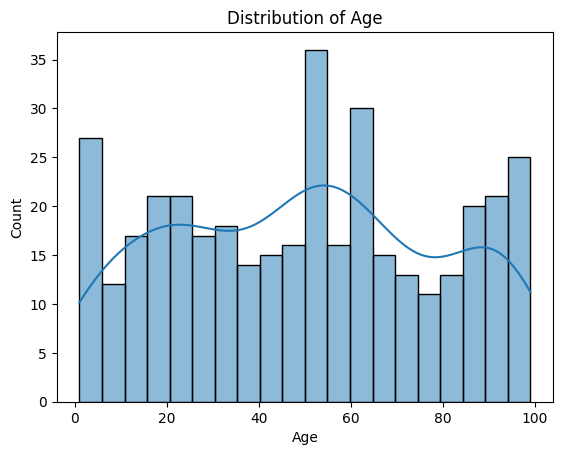

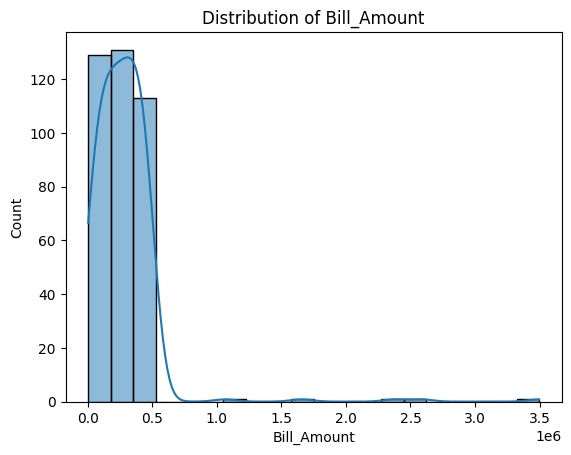

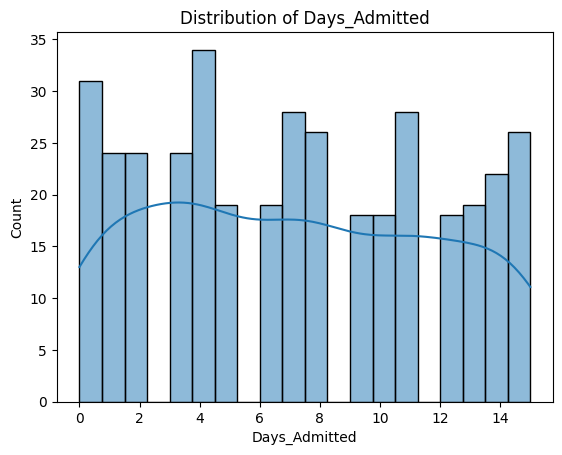

In [126]:
numeric_cols = ['Age', 'Bill_Amount', 'Days_Admitted']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

In [105]:
cat_cols

['Patient_ID',
 'Name',
 'Gender',
 'Blood_Type',
 'Disease',
 'Admission_Date',
 'Discharge_Date',
 'Doctor',
 'Hospital_Department',
 'Payment_Method',
 'City',
 'Follow_Up_Required']

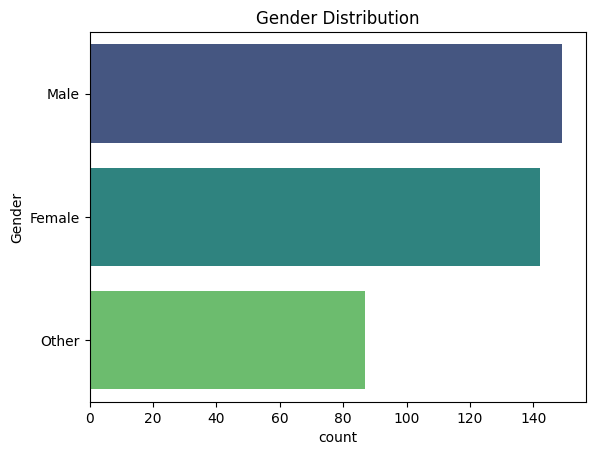

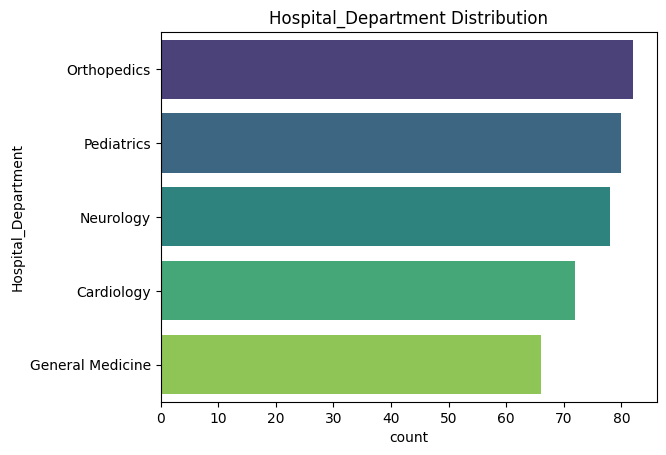

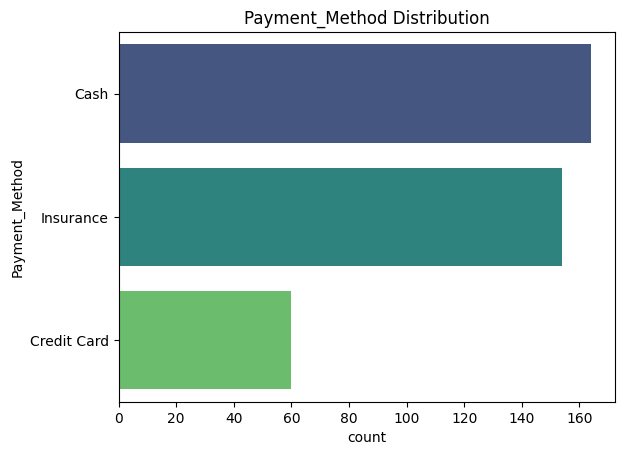

In [106]:
# Categorical columns
categorical_cols = ['Gender', 'Hospital_Department', 'Payment_Method']
for col in categorical_cols:
    plt.figure()
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"{col} Distribution")
    plt.show()

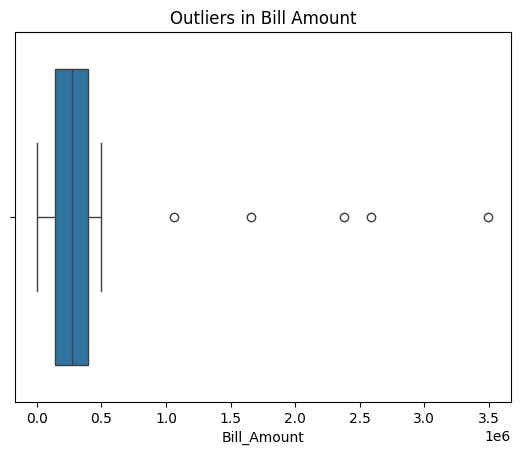

In [107]:
# Boxplot for bill amount to detect outliers
plt.figure()
sns.boxplot(x=df['Bill_Amount'])
plt.title("Outliers in Bill Amount")
plt.show()

Bivariate Analysis

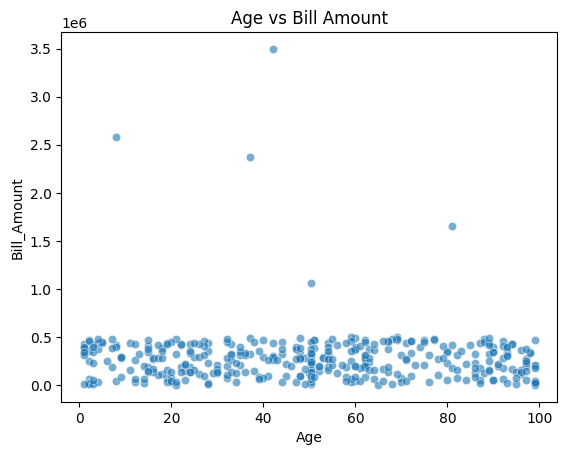

In [108]:
# Age vs Bill
plt.figure()
sns.scatterplot(x='Age', y='Bill_Amount', data=df, alpha=0.6)
plt.title("Age vs Bill Amount")
plt.show()

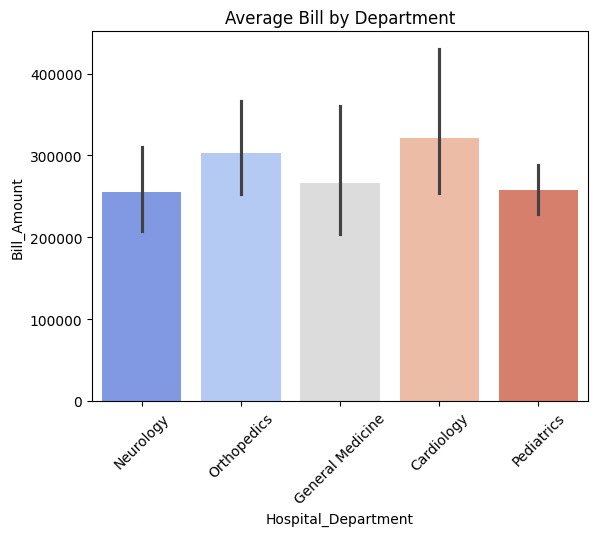

In [109]:
# Department vs Average Bill
plt.figure()
sns.barplot(x='Hospital_Department', y='Bill_Amount', data=df, estimator='mean', palette='coolwarm')
plt.title("Average Bill by Department")
plt.xticks(rotation=45)
plt.show()

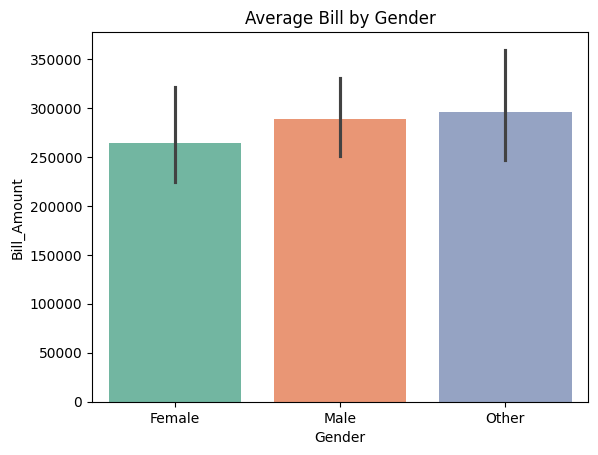

In [110]:
# Gender vs Average Bill
plt.figure()
sns.barplot(x='Gender', y='Bill_Amount', data=df, estimator='mean', palette='Set2')
plt.title("Average Bill by Gender")
plt.show()

 Time-Based Analysis

In [111]:
# Extract month, weekday, year
df['Month'] = df['Admission_Date'].dt.month_name()
df['Weekday'] = df['Admission_Date'].dt.day_name()
df['Year'] = df['Admission_Date'].dt.year

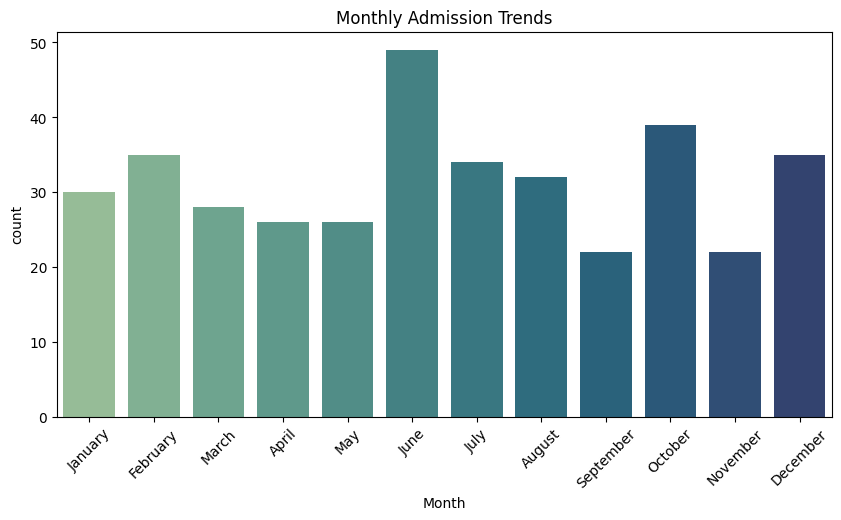

In [112]:
# Monthly admission trend
plt.figure(figsize=(10,5))
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x='Month', data=df, order=order_months, palette='crest')
plt.title("Monthly Admission Trends")
plt.xticks(rotation=45)
plt.show()

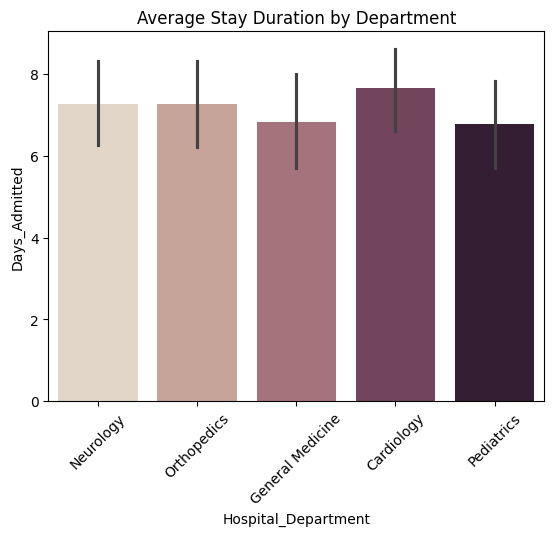

In [113]:
# Stay duration trend by department
plt.figure()
sns.barplot(x='Hospital_Department', y='Days_Admitted', data=df, estimator='mean', palette='ch:s=.25')
plt.title("Average Stay Duration by Department")
plt.xticks(rotation=45)
plt.show()

Correlation & Relationships

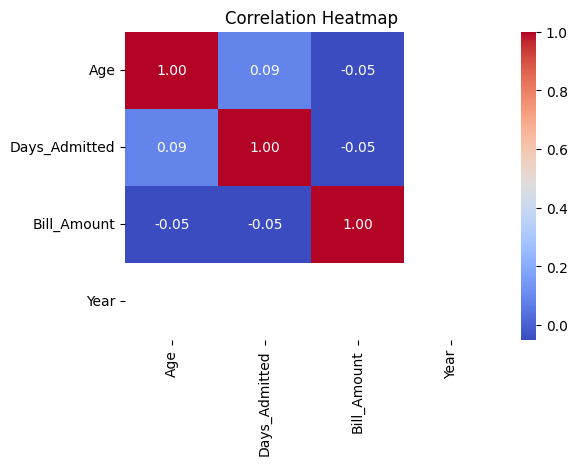

In [114]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

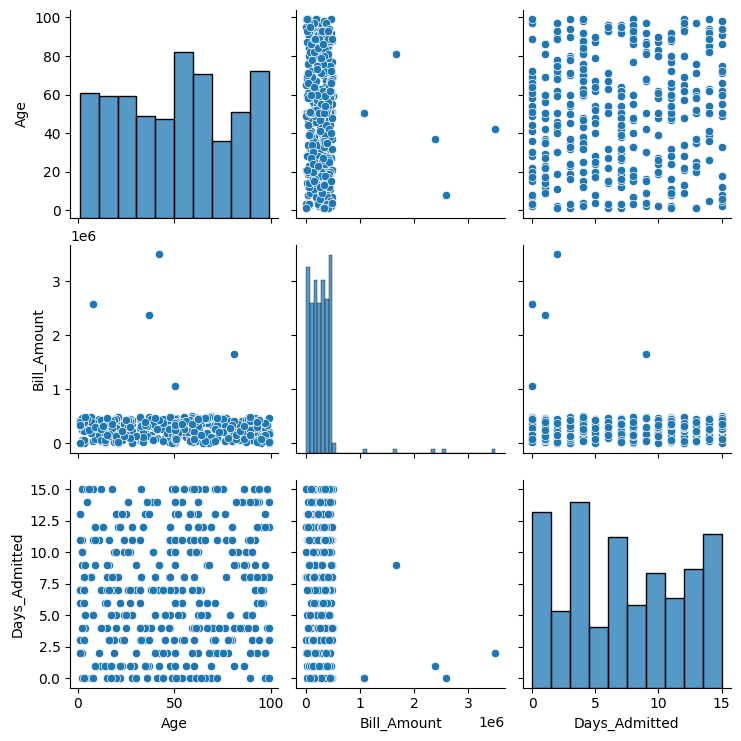

In [115]:
# Pairplot for numeric variables
sns.pairplot(df[numeric_cols])
plt.show()

 Insights & Conclusions
 1️. Average patients age is 49.9
 2️. Most visited department is Orthopedics
 3️. Highest average bill department is Cardiology
 4️. Average stay duration is 7 days
 5️. Peak admission month is June
 6️. Most common payment method is Cash
 7. Bill amount strongly correlates with stay duration